### import gym 
gym.version.VERSION

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv

/Users/samueloliveira/opt/anaconda3/envs/maai-env/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [2]:
env = GridworldEnv('') # Number of plan 

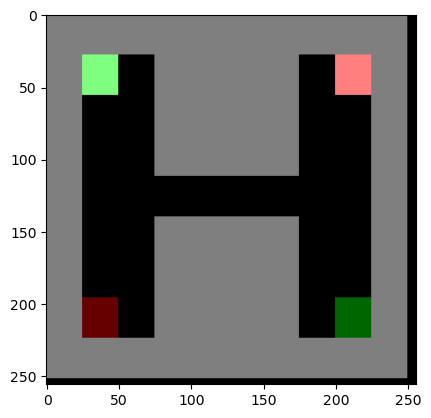

In [3]:
env.render()

In [4]:
env.observation_space

Box(-1.0, [8. 9. 5. 1. 8. 9. 5. 1.], (8,), float32)

In [5]:
print(env.reset())
#print(env.action_space.sample())
env.step([env.action_space[0].sample(),env.action_space[1].sample()])
#env.step(env.action_space.sample())

[1, 1, 0.0, 0.0, 1, 8, 0.0, 0.0]


(array([1., 2., 4., 0., 1., 7., 3., 0.]),
 [0.0, 0.0],
 False,
 {'success': [True, True]})

In [6]:
env.verbose = True
print( env._get_agents_start_target_state())

((1, 1), (7, 8), (1, 8), (7, 1))


In [7]:
env.grid_map_shape

(9, 10)

In [8]:
env.observation_space

Box(-1.0, [8. 9. 5. 1. 8. 9. 5. 1.], (8,), float32)

In [9]:
env.action_space

{0: Discrete(5), 1: Discrete(5)}

[1, 1, 0.0, 0.0, 1, 8, 0.0, 0.0]
State 				 - Reward
[1. 1. 2. 0. 1. 8. 4. 0.] 			 [0.0, 0.0]
[1. 1. 0. 0. 1. 8. 2. 0.] 			 [0, 0.0]
[2. 1. 1. 0. 1. 8. 4. 0.] 			 [0.0, 0.0]
[1. 1. 2. 0. 1. 7. 3. 0.] 			 [0.0, 0.0]
[2. 1. 1. 0. 2. 7. 1. 0.] 			 [0.0, 0.0]
Total episode reward:  0.0


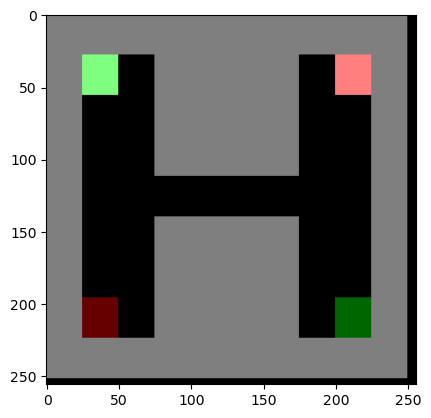

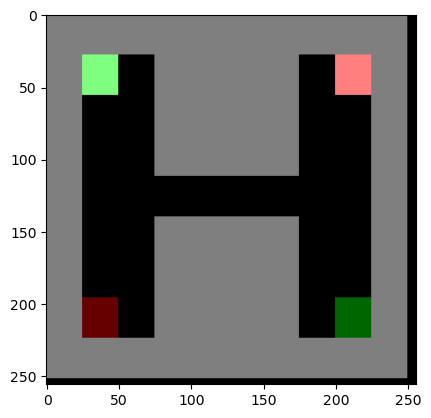

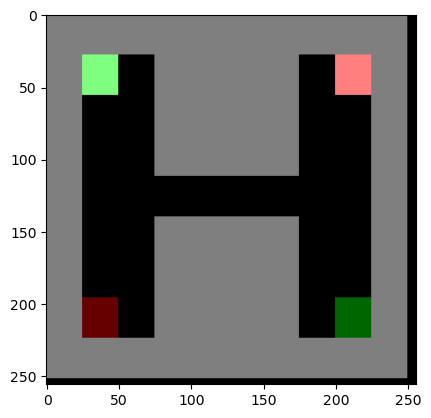

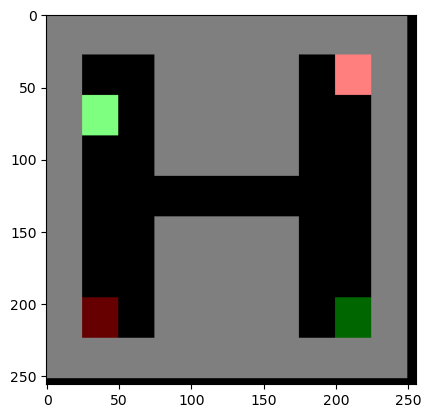

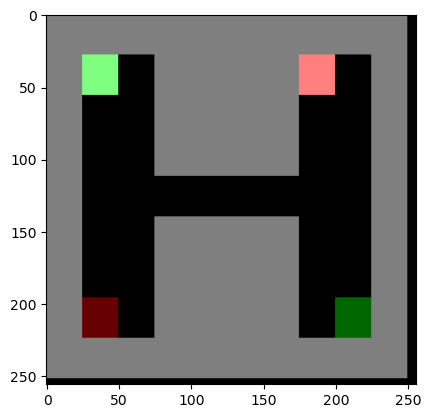

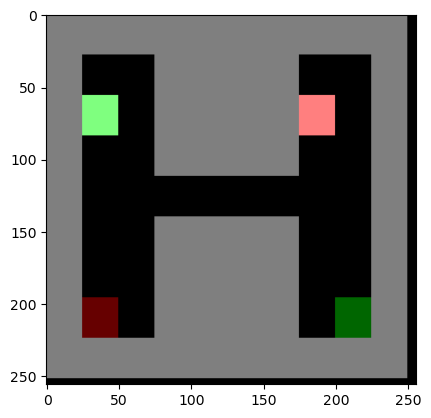

In [16]:
# Try random policy, seems to work
print(env.reset())
env.render()
print('State \t\t\t\t - Reward')
for i in range(5):
    move0,move1 = env.action_space[0].sample(),env.action_space[1].sample()
    obs , rewards, _, _ =  env.step([move0,move1]) 
    print(obs,'\t\t\t',rewards)
        
    env.render()
    
print('Total episode reward: ', env.episode_total_reward)

## Q-learning Example

In [17]:
# Q learning params
ALPHA = 0.1 # learning rate
GAMMA = 0.95 # reward discount
LEARNING_COUNT = 1000
TEST_COUNT = 100

TURN_LIMIT = 1000
IS_MONITOR = True

class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward_1 = 0.0
        self.episode_reward_2 = 0.0
        self.q_val = np.zeros(9*10*5*2*9*10*5*2).reshape(9,10,5,2,9,10,5,2).astype(np.float32)

    def learn(self):
        # one episode learning
        state = self.env.reset()
        #self.env.render()
        
        for t in range(TURN_LIMIT):
            act0,act1 = env.action_space[0].sample(),env.action_space[1].sample()
            obs , rewards, _, _ =  env.step([act0,act1]) 
            act = self.env.action_space.sample() # random
            next_state, reward, done, info = self.env.step(act, self.idx)
            assert len(next_state) == 6
            coords = state[self.idx * 3]
            q_next_max = np.max(self.q_val[int(64.*(coords+1.)/2.)])
            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            self.q_val[int(64.*(coords+1.)/2.)][act] = (1 - ALPHA) * self.q_val[int(64.*(coords+1.)/2.)][act]\
                                 + ALPHA * (reward + GAMMA * q_next_max)
            
            self.episode_reward += reward
            #self.env.render()
            if done:
                return self.env.episode_total_reward
            else:
                state = next_state
                
        return 0.0 # over limit

    def test(self):
        state = self.env.reset()
        for t in range(TURN_LIMIT):
            norm_coords = state[self.idx * 3]
            act = np.argmax(self.q_val[int(64.*(norm_coords+1.)/2.)])
            next_state, reward, done, info = self.env.step(act, self.idx)
            if done:
                return self.env.episode_total_reward
            else:
                state = next_state
        return 0.0 # over limit

env = GridworldEnv('')
env.reset()
agent1 = Agent(env, 0)
agent2 = Agent(env, 1)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for i in range(LEARNING_COUNT):
    reward_total_1 += agent1.learn()
    reward_total_2 += agent2.learn()
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
print("agent 1 Q Value       :{}".format(agent1.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))
print("agent 2 Q Value       :{}".format(agent2.q_val))

print("###### TEST #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for i in range(TEST_COUNT):
    reward_total_1 += agent1.test()
    reward_total_2 += agent2.test()
print("episodes      : {}".format(TEST_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / TEST_COUNT))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / TEST_COUNT))



###### LEARNING #####


AttributeError: 'dict' object has no attribute 'sample'

In [12]:
Q_a1 = agent1.q_val 
policy_function1 = np.argmax( Q_a1 , axis = 1).reshape(8,8)

Q_a2 = agent2.q_val 
policy_function2 = np.argmax( Q_a2 , axis = 1).reshape(8,8)

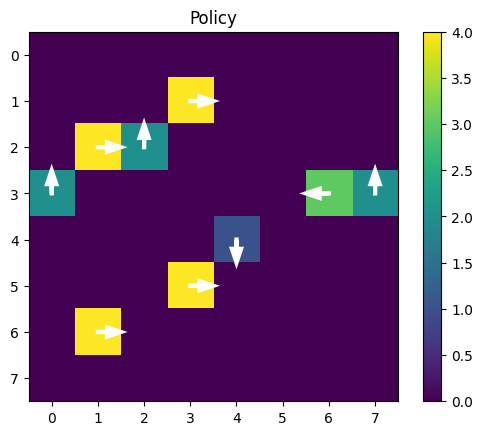

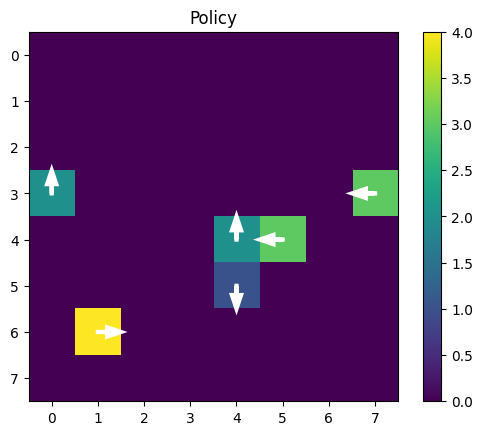

In [13]:
def plot_policy( policy_function ):

    plt.figure()
    plt.imshow( policy_function , interpolation='none' )
    plt.colorbar()

    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row][col] == 0:
                continue 
            if policy_function[row][col] == 1:
                dx = 0; dy = .5
            if policy_function[row][col] == 2:
                dx = 0; dy = -.5
            if policy_function[row][col] == 3:
                dx = -.5; dy = 0
            if policy_function[row][col] == 4:
                dx = .5; dy = 0
            plt.arrow( col , row , dx , dy , shape='full', fc='w' , ec='w' , lw=3, length_includes_head=True, head_width=.2 )
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

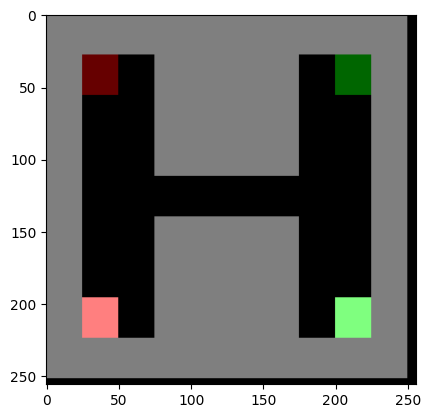

In [14]:
env.reset()
env.render()